In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esercizi/Lezione_13/bmd.csv", sep=",")
display(df)

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


In [97]:
df = df.drop("id", axis=1)


In [98]:
age =  df["age"]
weight = df["weight_kg"]
height = df["height_cm"]
bmd = df["bmd"]

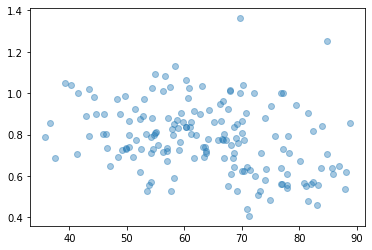

In [99]:
plt.scatter(age,bmd, alpha=0.4)
plt.show()

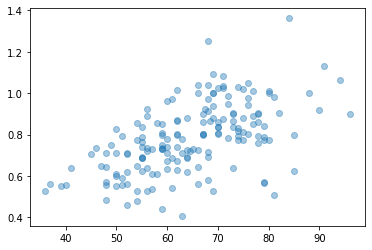

In [100]:
plt.scatter(weight,bmd,alpha=0.4)
plt.show()

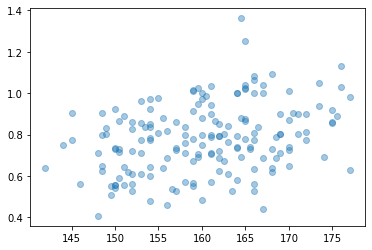

In [101]:
plt.scatter(height,bmd, alpha=0.4)
plt.show()

In [102]:
bmi = weight.to_numpy()/((height/100)**2)
display(bmi)
df.insert(3,"bmi",bmi)

0      26.467882
1      29.721079
2      25.111583
3      27.392257
4      21.218317
         ...    
164    27.513385
165    22.761468
166    23.458562
167    25.402816
168    25.160698
Name: height_cm, Length: 169, dtype: float64

,age,sex,fracture,bmi,weight_kg,height_cm,medication,waiting_time,bmd
0,57.052768,F,no fracture,26.467882,64.0,155.5,Anticonvulsant,18,0.8793
1,75.741225,F,no fracture,29.721079,78.0,162.0,No medication,56,0.7946
2,70.778900,M,no fracture,25.111583,73.0,170.5,No medication,10,0.9067
3,78.247175,F,no fracture,27.392257,60.0,148.0,No medication,14,0.7112
4,54.191877,M,no fracture,21.218317,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,77.982543,M,fracture,27.513385,74.0,164.0,No medication,49,0.7941
165,50.285303,F,fracture,22.761468,59.0,161.0,No medication,6,0.7971
166,46.359721,M,fracture,23.458562,67.0,169.0,No medication,10,0.8037
167,54.788368,M,fracture,25.402816,70.0,166.0,No medication,14,0.8072


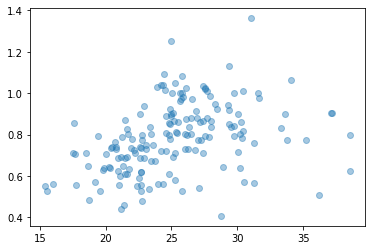

In [103]:
display(df)
plt.scatter(bmi,bmd,alpha=0.4)
plt.show()

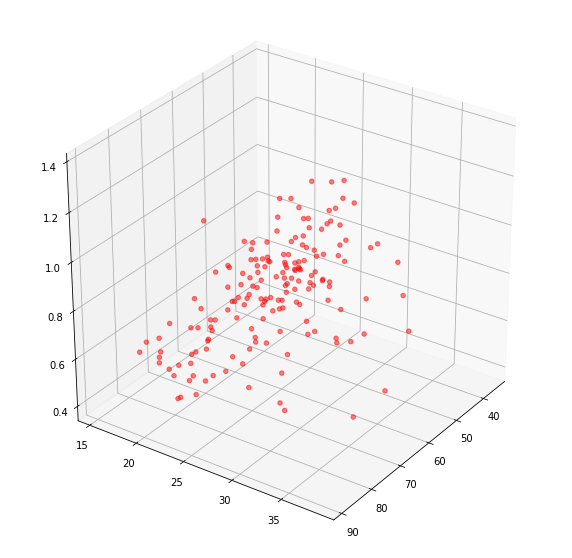

In [104]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')
ax.scatter3D(age, bmi, bmd, color="red", alpha = 0.5)
ax.view_init(30, 35)
plt.show()



In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train,x_test,y_train,y_test = train_test_split(df[["age","bmi"]], df["bmd"], test_size=0.3, shuffle=True, random_state=42)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

pred = linreg.predict(x_test)


0.021419445987186033

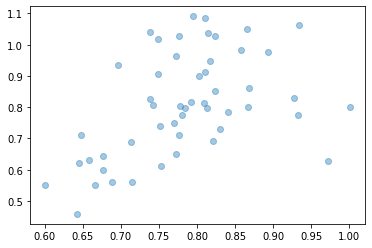

0.19296923248115871

In [106]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

smse = mean_squared_error(pred,y_test, squared=True)
display(smse)

plt.scatter(pred, y_test, alpha=0.4)
plt.show()

R2 = r2_score(y_test,pred)
display(R2)

In [107]:
from sklearn.preprocessing import PolynomialFeatures 


poly_regr = PolynomialFeatures(degree = 4)
x_poly_train = poly_regr.fit_transform(x_train) 
x_poly_test = poly_regr.fit_transform(x_test) 


In [108]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

poly_y_pred = poly_reg.predict(x_poly_test)

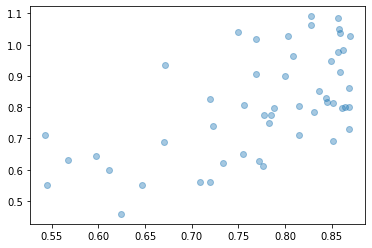

In [109]:
plt.scatter(poly_y_pred, y_test, alpha=0.4)
plt.show() 

In [110]:
poly_smse = mean_squared_error(y_test,poly_y_pred, squared=True)
display(poly_smse)

poly_r2 = r2_score(poly_y_pred,y_test)
display(poly_r2)

0.017835436867143555

-1.148597386563027

In [113]:
df["fracture"].replace({"fracture":1, "no fracture":0},inplace=True)

In [114]:
display(df)

,age,sex,fracture,bmi,weight_kg,height_cm,medication,waiting_time,bmd
0,57.052768,F,0,26.467882,64.0,155.5,Anticonvulsant,18,0.8793
1,75.741225,F,0,29.721079,78.0,162.0,No medication,56,0.7946
2,70.778900,M,0,25.111583,73.0,170.5,No medication,10,0.9067
3,78.247175,F,0,27.392257,60.0,148.0,No medication,14,0.7112
4,54.191877,M,0,21.218317,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,77.982543,M,1,27.513385,74.0,164.0,No medication,49,0.7941
165,50.285303,F,1,22.761468,59.0,161.0,No medication,6,0.7971
166,46.359721,M,1,23.458562,67.0,169.0,No medication,10,0.8037
167,54.788368,M,1,25.402816,70.0,166.0,No medication,14,0.8072


In [115]:
from sklearn.linear_model import LogisticRegression

x_log_train,x_log_test,y_log_train,y_log_test = train_test_split(df[["age","bmi","bmd"]], df["fracture"], test_size=0.3, shuffle=True, random_state=42)

logreg = LogisticRegression()

logreg.fit(x_log_train,y_log_train)

log_pred = logreg.predict(x_log_test)

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_log_test, log_pred)

print("True  Positive: ",  cm[0][0])
print("False Positive: ", cm[0][1])
print("\n")
print("True  Negative: ", cm[1][1])
print("False Negative: ", cm[1][0])

tpr = cm[0][0]/(cm[0][0]+cm[1][0])


fpr = cm[0][1]/(cm[0][1]+cm[1][1])

accuratezza = (cm[0][0]+cm[1][1])/(cm.size)

precisione = cm[0][0]/(cm[0][0]+cm[0][1])

display(tpr)
display(fpr)
display(accuratezza)
display(precisione)



True  Positive:  35
False Positive:  2


True  Negative:  8
False Negative:  6


0.8536585365853658

0.2

10.75

0.9459459459459459